# The Most Important Models of Your Data Science Career

TODO: Talk about the value prop of this lecture, how this will talk about when to use what, overview of the three models covered

TODO: Talk about interpretability vs. predictive power

## Linear Models: Linear Regression and Logistic Regression

<img src="https://raw.githubusercontent.com/JeffMacaluso/Talks/master/TheMostImportantModels/images/LinearRegression.png" width="500">

TODO: Talk about -

### What are they?

Linear and logistic regression are known as linear models. They are the first models that are taught in the world of machine learning because they are simple, a fundamental building block, and extremely powerful. These models are used in many other fields - statistics, econometrics, finance, experimentation, etc., so you may have already know about them. These are going to be the most common models you will use because you should always train a linear model as a baseline when approaching any traditional machine learning problem. This is because they are extremely quick to train, don't require intense hyperparameter tuning, and they will help you understand what kind of reasonable performance you can obtain. Remember, in the real world, the time spent hyperparameter tuning more complex models is often better spent cleaning messy data. TODO: Reword this last sentence

**Linear Regression**

Also referred to as **o**rdinary **l**east **s**quares (OLS), ordinary regression, either univariate or multivariate regression (depending on how many features/predictors you are using), etc. TODO: Talk about what it is and why it's important

**Logistic Regression**

Also referred to as a **g**eneralized **l**inear **m**odel (GLM). TODO: Talk about how it's for classification.

### How do they work?

<img src="https://raw.githubusercontent.com/JeffMacaluso/Talks/master/TheMostImportantModels/images/LinearRegressionGradientDescent.gif" width="1200">

- How quick they are to run
    - Why they should always be used as a baseline model
- Interpretability
- Cons:
    - A lot of assumptions
    - Not robust to outliers
    - Require linear assumption
    - Show anscombe's quartet
    
```{python}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset('anscombe')

# Showing same mean/sd/percentiles for the predictor
df.groupby('dataset')['x'].describe()

# Show the results of a linear regression within each dataset
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=df,
           col_wrap=2, ci=None, palette='muted', height=4,
           scatter_kws={'s': 50, 'alpha': 1})
```

*Credit: Alykhan Tejani*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = sns.load_dataset('mpg').dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [40]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()

features = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
label = df['mpg']

linear_regression_model.fit(features, label)

for coef in linear_regression_model.coef_:
    print(coef)

-0.3979283590642208
-8.313012222574152e-05
-0.045257080150839846
-0.005186917347611087
-0.02910471399018394


In [62]:
import statsmodels.api as sm

# Adding the intercept constant for the statsmodels API
features_for_statsmodels_api = sm.add_constant(features, prepend=False)

mod = sm.OLS(label, features_for_statsmodels_api)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          9.82e-101
Time:                        19:33:43   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.3979      0.411     -0.969   

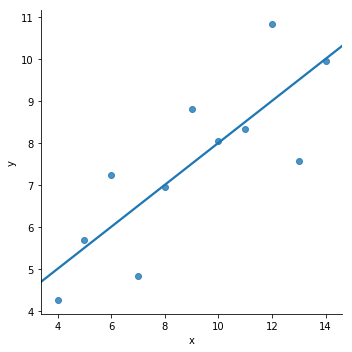

In [17]:
sns.lmplot(x='x', y='y', data=df[df['dataset'] == 'I'], ci=None)

In [19]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()

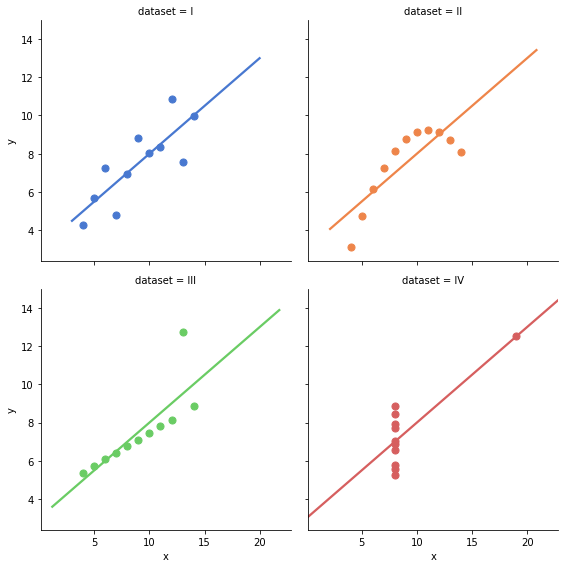

In [4]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [9]:
df.groupby('dataset')['x'].describe()

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
I,11.0,9.0,3.316625,4.0,6.5,9.0,11.5,14.0
II,11.0,9.0,3.316625,4.0,6.5,9.0,11.5,14.0
III,11.0,9.0,3.316625,4.0,6.5,9.0,11.5,14.0
IV,11.0,9.0,3.316625,8.0,8.0,8.0,8.0,19.0


## Decision Trees: Classification and Regression Trees (CART)

<img src="https://raw.githubusercontent.com/JeffMacaluso/Talks/master/TheMostImportantModels/images/DecisionTreeIllustration.png">

TODO: Talk about -
- What they are
- How they work
    - Show [this blog post](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
- How quick they are to run
- Interpretability
    - Only to a certain point
- Con: Prone to overfitting

<img src="https://clearpredictions.com/Images/tree-infographic.png" width="1200">

## Random Forests

<img src="https://raw.githubusercontent.com/JeffMacaluso/Talks/master/TheMostImportantModels/images/RandomForestDiagram.png">

TODO: Talk about -
- What they are
- How they work
- How quick they are to run
- Interpretability
    - Only to a certain point
- Con: Prone to overfitting